In [1]:
import pandas as pd
import numpy as np

In [22]:
data=pd.read_csv('insurance.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace = True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
indexColArray = np.array(list(range(0, len(data))))

#2. Assign the above array to data
data.set_index(indexColArray, inplace=True)

data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [24]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [26]:
data[data.age < 0]

,age,sex,bmi,children,smoker,region,charges


In [27]:
data[data.bmi < 0]

,age,sex,bmi,children,smoker,region,charges


In [29]:
data[data.charges < 0]

,age,sex,bmi,children,smoker,region,charges


In [30]:
data.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [10]:
data.sex.unique()


array(['female', 'male'], dtype=object)

In [11]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [31]:
data_dummy=pd.get_dummies(data.region)
x1=data.drop('region',axis=1)

x1

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,3,no,10600.54830
1333,18,female,31.920,0,no,2205.98080
1334,18,female,36.850,0,no,1629.83350
1335,21,female,25.800,0,no,2007.94500


In [32]:
data.sex.replace(['female','male'],[0,1],inplace=True)

In [33]:
data.smoker.replace(['yes', 'no'],[0,1],inplace=True)

In [21]:
x=pd.concat([data_dummy,x1],axis=1)
x

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,0,0,0,1,19,0,27.900,0,0,16884.92400
1,0,0,1,0,18,1,33.770,1,1,1725.55230
2,0,0,1,0,28,1,33.000,3,1,4449.46200
3,0,1,0,0,33,1,22.705,0,1,21984.47061
4,0,1,0,0,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1332,0,1,0,0,50,1,30.970,3,1,10600.54830
1333,1,0,0,0,18,0,31.920,0,1,2205.98080
1334,0,0,1,0,18,0,36.850,0,1,1629.83350
1335,0,0,0,1,21,0,25.800,0,1,2007.94500


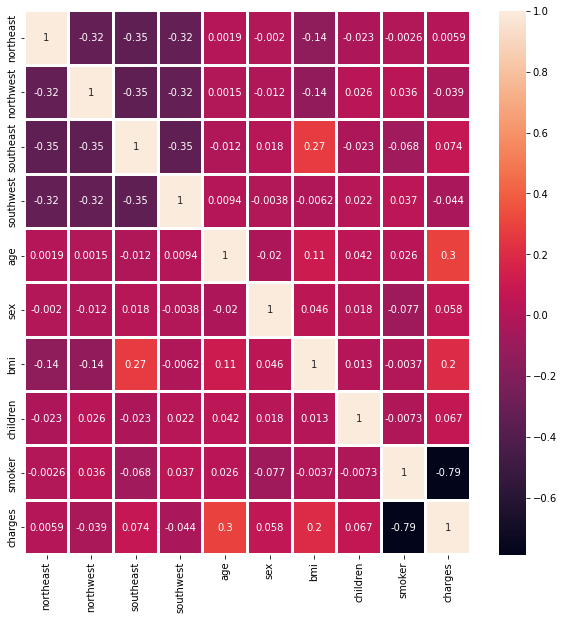

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(), annot=True, linewidth=2)
plt.show()

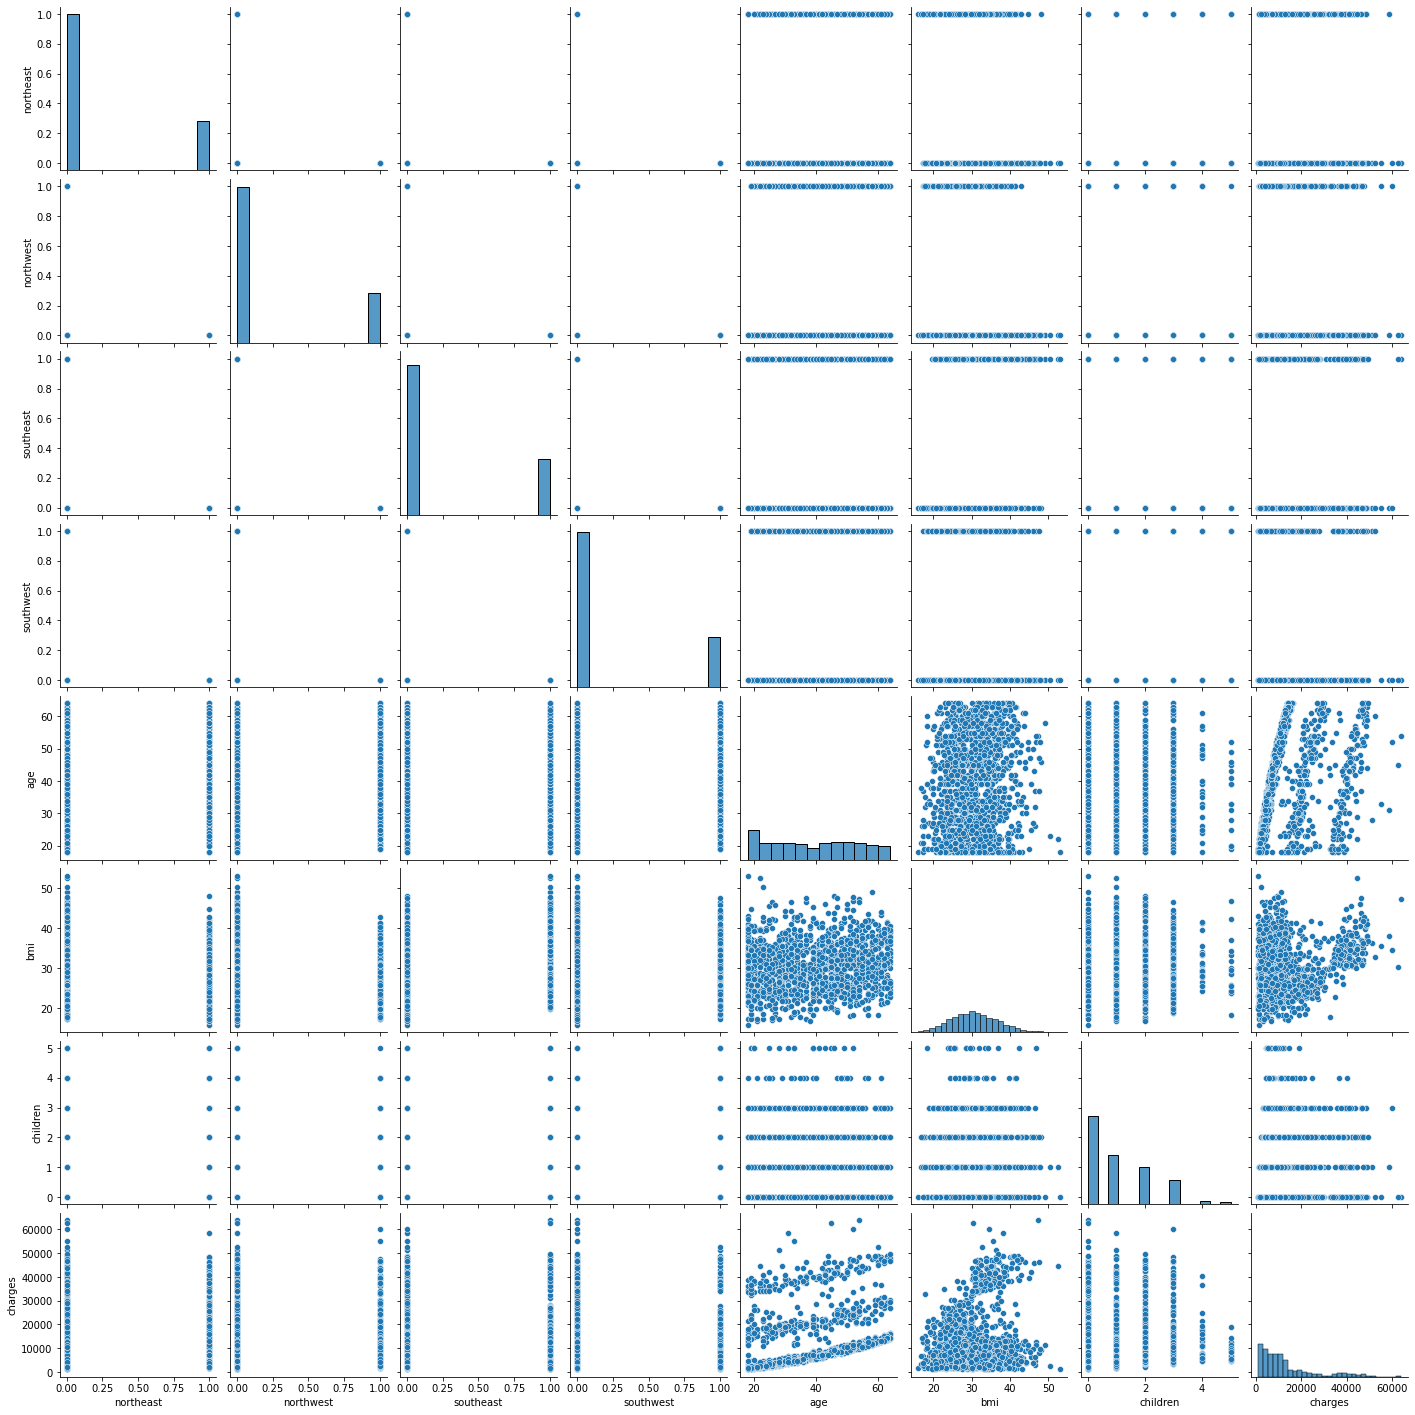

In [19]:
sns.pairplot(x)

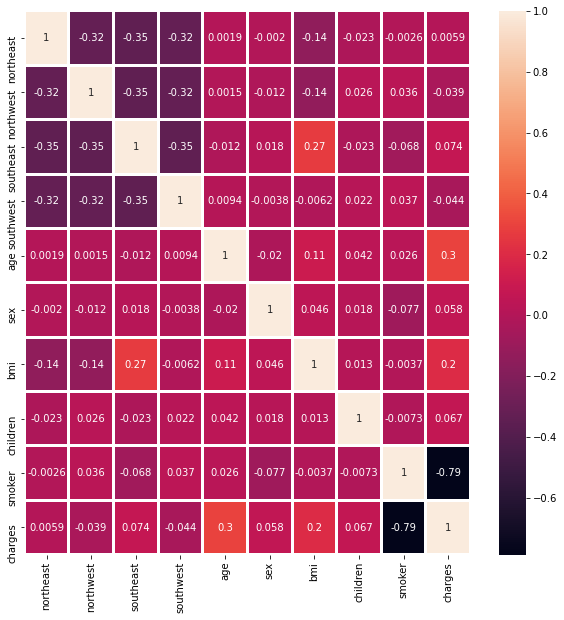

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(x.corr(), annot=True, linewidth=2)
plt.show()

In [ ]:
#THERE IS STRONG CO_RELATION BETWEEN THE INDEPENDENT AND DEPENDENT VARIBLES SMOKER AND CAHRGES

In [40]:
xfeature=x.drop('charges',axis=1)
xfeature

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker
0,0,0,0,1,19,0,27.900,0,0
1,0,0,1,0,18,1,33.770,1,1
2,0,0,1,0,28,1,33.000,3,1
3,0,1,0,0,33,1,22.705,0,1
4,0,1,0,0,32,1,28.880,0,1
...,...,...,...,...,...,...,...,...,...
1332,0,1,0,0,50,1,30.970,3,1
1333,1,0,0,0,18,0,31.920,0,1
1334,0,0,1,0,18,0,36.850,0,1
1335,0,0,0,1,21,0,25.800,0,1


In [41]:
ylabel=data['charges']
ylabel

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xfeature,ylabel,test_size=0.2)

In [45]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [47]:
reg=model.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([ 2970.67690493, 12534.1581879 , 32504.1746174 , 18152.79988831,
       32497.93713784,  2852.95472138,  7074.85819326, 24097.9017771 ,
       31152.13212526, 18026.72973795,   253.43698685, 16280.66424925,
       35574.67344445,  5030.55634834, 31022.1651954 ,  7979.84006938,
        5904.44574033, 23798.59880419, 10760.86345521, 11923.77734005,
       12203.55733331,  6318.95613307, 36625.900717  ,  8067.85884282,
       38723.9174065 , 13641.07743421, 26063.62819849, 11709.00780567,
        9667.84807703, 10202.67941   , 13516.45382888,  2241.91675329,
        4488.85976381,  4135.84810474, 27693.51468165, 15030.85932203,
       36267.17545368, 12856.45699297, 11482.56306748,  5888.26424815,
       10955.36745578, 29773.23724647, 27492.90196156, 10458.69082851,
       16243.79776316, 24518.76023168, 36930.8438584 ,  6788.63845834,
       15261.90175877, 14255.42757856, 32504.53739552, 25673.72058172,
       27198.98514146,  8392.78993115,  3589.21292626, 11901.28370107,
      

In [48]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_test,y_pred)

0.7379723040453661

In [58]:
xnew=xfeature[['age','bmi','smoker']]
xnew

,age,bmi,smoker
0,19,27.900,0
1,18,33.770,1
2,28,33.000,1
3,33,22.705,1
4,32,28.880,1
...,...,...,...
1332,50,30.970,1
1333,18,31.920,1
1334,18,36.850,1
1335,21,25.800,1


In [59]:
ylabel

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnew,ylabel,test_size=0.2)

In [70]:
from sklearn import linear_model
model=linear_model.LinearRegression()
reg=model.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([ 6.38275483e+03,  3.39273240e+03,  1.05301360e+04,  1.07554415e+04,
        7.15323372e+03,  1.26409698e+04,  1.29053703e+04,  5.11818766e+03,
        1.07365558e+04,  1.10417977e+04,  3.42314093e+03,  9.98764319e+03,
        4.06968910e+04,  5.13513815e+03, -4.68726493e+02,  9.58528091e+03,
        2.88946609e+04,  3.60791662e+03,  5.99885568e+03,  1.54125491e+04,
        2.78662991e+04,  4.03008129e+04,  5.92082129e+03,  5.39174194e+03,
        3.34342051e+04,  3.38489800e+04,  3.75306683e+04,  4.12438307e+03,
        6.23443824e+03,  3.88209836e+04,  3.29183948e+04,  8.15541338e+03,
        1.44788608e+04,  1.38449130e+03,  2.74823221e+04,  1.14072264e+03,
        5.48932953e+03, -2.83146177e+01,  9.24292380e+03,  3.06986956e+04,
        1.11819282e+04,  6.58959723e+03,  6.45408251e+03,  1.40861568e+03,
        3.82845063e+03,  5.64354097e+03,  1.08211079e+04,  1.22000129e+04,
        2.99684797e+04,  8.82671417e+03,  1.26172680e+04,  2.80481274e+04,
        6.69780656e+03,  

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test,y_pred)

0.7637710648488749